# reading the soundfile

In [1]:
from python_speech_features import mfcc
from python_speech_features import logfbank
import scipy.io.wavfile as wav


In [2]:
(rate,sig) = wav.read("/home/shivam/Desktop/python codes/LDC2007S10.wav")
data = mfcc(sig,rate)

In [3]:
print(data.shape)

(179999, 13)


In [5]:
print (data)
data=data.reshape(data.shape[0],13)
data.shape

[[ 19.6884738    0.34520428 -18.96777002 ...  17.19743708   7.23626649
  -30.71404477]
 [ 19.6776887    6.5152444  -18.13150971 ...  36.56473388  15.91031454
  -20.585949  ]
 [ 19.38906465   4.09170589 -16.16741236 ...  35.76400799   9.97291938
  -27.12420088]
 ...
 [  4.48181023 -28.49382144  -1.39828052 ...   6.00959207   4.32710969
  -11.78033898]
 [  4.59760795 -31.19398402  -1.50272759 ...   0.10406072  -5.33376854
  -17.42454733]
 [  4.3957976  -30.3591145    0.93997567 ...   1.45635257  -3.36968642
  -10.39677659]]


(179999, 13)

In [6]:
print(data[0])

[ 19.6884738    0.34520428 -18.96777002 -18.91139043 -28.31415639
  -5.61446044 -28.95105212 -34.86181481  11.5893669   -4.58225194
  17.19743708   7.23626649 -30.71404477]


In [7]:
import soundfile as sf
from sklearn import cluster
import numpy as np
import pandas as pd
dataset, fs = sf.read('/home/shivam/Desktop/python codes/LDC2007S10.wav')

In [8]:
print [dataset]

[array([1.29913330e-01, 9.65881348e-02, 5.27648926e-02, ...,
       0.00000000e+00, 3.05175781e-05, 3.05175781e-05])]


In [9]:
#reshape the data 

In [10]:
dataset=dataset.reshape(dataset.shape[0],1)
ks=range(1,2)
dataset.shape

(28800000, 1)

In [11]:
Y=dataset[0:100]
Y.shape

(100, 1)

In [12]:
KMeans = [cluster.KMeans(n_clusters = i, init="k-means++").fit(data[179989:179999]) for i in ks]

In [13]:
print(len(KMeans))

1


# code for calculating Bayesian Information Criteria for a cluster of data

In [15]:
import numpy as np
from scipy.spatial import distance
def compute_bic(kmeans,X):
    """
    Computes the BIC metric for a given clusters

    Parameters:
    -----------------------------------------
    kmeans:  List of clustering object from scikit learn

    X     :  multidimension np array of data points

    Returns:
    -----------------------------------------
    BIC value
    """
    # assign centers and labels
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    #number of clusters
    
    m = kmeans.n_clusters
    #print(m)
    #print m
    #print (m)
    # size of the clusters
    n = np.bincount(labels)
    #size of data set
    N, d = X.shape
    #print m,N
    #print(X.shape)
    #print(d)
    #tmp=(1.0 / (N - m) / d) *sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])
    #print(tmp)
    #compute variance for all clusters beforehand
    #print(N-m)
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]], 'euclidean')**2) for i in range(m)])

    const_term = 0.5 * m * np.log(N) * (d+1)

    BIC = np.sum([n[i] * np.log(n[i]) -
               n[i] * np.log(N) -
             ((n[i] * d) / 2) * np.log(2*np.pi*cl_var) -
              ((n[i] - 1) * d/ 2) for i in range(m)]) - const_term

    return(BIC)

In [16]:
print(KMeans[0])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=1, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)


In [17]:
#compute BIC

In [18]:
BIC = [compute_bic(kmeansi,data[179989:179999]) for kmeansi in KMeans]
#BIC = compute_bic(kmeansi,dataset) 
print(BIC)

[-342.4814753693512]


# #code for detecting Speaker change  

In [66]:
#!/usr/bin/python
a=0
t=a+200
b=a+400
X_axis=[]
Y_axis=[]
Z_axis=[]
threshold= 300 #flexible as per penalty added and our knowledge too
count=0
for i in range(200,len(data)): 
    
    X1= data[a:t]
    X2= data[t:b]
    X=  data[a:b]
    
    if(X2.shape[0]<200):
        break        
    #compute_bic(X1) compute BIC(X2)
    bic1= BIC = [compute_bic(kmeansi,X1) for kmeansi in KMeans]
    bic2= BIC = [compute_bic(kmeansi,X2) for kmeansi in KMeans]
    bic= BIC = [compute_bic(kmeansi,X) for kmeansi in KMeans]
    diff= abs((bic1[0]+bic2[0])-bic[0])
    #print bic1[0]
    #print bic2[0]
    
    if diff>threshold:
                print "speaker change detected at ",(t)," frame"
                X_axis.append(t)
                Y_axis.append(threshold)
                Z_axis.append(diff)
                
                count=count+1
                a=b
                t=a+200
                b=a+400
                #print a,t,b
    else:
                t=t+1
                a=t-200
                b=t+200
        

speaker change detected at  200  frame
speaker change detected at  600  frame
speaker change detected at  1000  frame
speaker change detected at  1400  frame
speaker change detected at  1800  frame
speaker change detected at  2200  frame
speaker change detected at  2600  frame
speaker change detected at  3000  frame
speaker change detected at  3400  frame
speaker change detected at  3800  frame
speaker change detected at  4200  frame
speaker change detected at  4600  frame
speaker change detected at  5000  frame
speaker change detected at  5400  frame
speaker change detected at  5800  frame
speaker change detected at  6200  frame
speaker change detected at  6600  frame
speaker change detected at  7000  frame
speaker change detected at  7400  frame
speaker change detected at  7800  frame
speaker change detected at  8200  frame
speaker change detected at  8600  frame
speaker change detected at  9000  frame
speaker change detected at  9400  frame
speaker change detected at  9800  frame
sp

speaker change detected at  82200  frame
speaker change detected at  82600  frame
speaker change detected at  83000  frame
speaker change detected at  83400  frame
speaker change detected at  83800  frame
speaker change detected at  84200  frame
speaker change detected at  84600  frame
speaker change detected at  85000  frame
speaker change detected at  85400  frame
speaker change detected at  85800  frame
speaker change detected at  86200  frame
speaker change detected at  86600  frame
speaker change detected at  87000  frame
speaker change detected at  87400  frame
speaker change detected at  87800  frame
speaker change detected at  88200  frame
speaker change detected at  88600  frame
speaker change detected at  89000  frame
speaker change detected at  89400  frame
speaker change detected at  89800  frame
speaker change detected at  90200  frame
speaker change detected at  90600  frame
speaker change detected at  91000  frame
speaker change detected at  91400  frame
speaker change d

In [67]:
print (count)

442


In [68]:
#checking results : plot diff vs time frame  
x=0
y=480


# code for processing the transcript file

In [69]:
import pandas as pd
import numpy as np
import math

In [70]:
final_list=[]
with open('transcript.txt','r') as f:
    for line in f:
        line_list=[]
        for word in line.split(" "):
            line_list.append(word)
        final_list.append(line_list)

In [71]:
print(final_list[0][1])

CATEGORY


In [72]:
print(len(final_list))

557


In [73]:
print(final_list[17][2],final_list[17][3],final_list[17][4])
print(final_list[18][2],final_list[18][3],final_list[18][4])
print(final_list[19][2],final_list[19][3],final_list[19][4])
print(final_list[20][2],final_list[20][3],final_list[20][4])
print(final_list[21][2],final_list[21][3],final_list[21][4])

('peter_jennings', '0.000000', '3.740000')
('peter_jennings', '3.740000', '12.227000')
('peter_jennings', '12.227000', '21.912000')
('peter_jennings', '21.912000', '27.496000')
('inter_segment_gap', '27.496000', '31.071000')


In [74]:
speaker_segment=pd.DataFrame(columns=['speaker','start','end'])

In [75]:
sp=0
st=0
en=0
for i in range(17,len(final_list)):
    speaker_segment=speaker_segment.append({'speaker':final_list[i][2], 'start':final_list[i][3], 'end':final_list[i][4]}, ignore_index=True)
#     speaker_segment.loc[sp]=final_list[i][2]
#     speaker_segment.loc[st]=final_list[i][3]
#     speaker_segment.loc[en]=final_list[i][4]

    sp=sp+1
    st=st+1
    en=en+1


In [76]:
print(sp)

540


In [77]:
print(speaker_segment)

               speaker        start          end
0       peter_jennings     0.000000     3.740000
1       peter_jennings     3.740000    12.227000
2       peter_jennings    12.227000    21.912000
3       peter_jennings    21.912000    27.496000
4    inter_segment_gap    27.496000    31.071000
5               spkr_1    31.071000    38.067000
6       peter_jennings    38.067000    82.637000
7    inter_segment_gap    82.637000    83.813000
8      gillian_findlay    83.813000   130.746000
9               spkr_2   130.746000   137.416000
10     gillian_findlay   137.416000   140.441000
11     gillian_findlay   140.441000   173.719000
12              spkr_3   173.719000   189.055000
13     gillian_findlay   189.055000   214.275000
14     excluded_region   214.275000   214.724000
15      peter_jennings   214.724000   216.408000
16      peter_jennings   216.408000   220.714000
17      peter_jennings   220.714000   244.076000
18         betsy_stark   244.076000   264.433000
19       george_w_bu

In [78]:
no_of_data_points,n_colm=speaker_segment.shape
print(no_of_data_points)

540


#MERGING CONTINUOUS SPEAKER

In [79]:
cmp_ind=0
i=1
while i<no_of_data_points:
    if speaker_segment.iloc[cmp_ind][0]==speaker_segment.iloc[i][0]:
        speaker_segment.iloc[cmp_ind][2]=speaker_segment.iloc[i][2]
        speaker_segment=speaker_segment.drop(speaker_segment.index[[i]])
        #c=c+1
    else:
        cmp_ind=i
        i=i+1
    no_of_data_points,n_colm=speaker_segment.shape
#     print("i=",i)
#     print("cmp_ind=",cmp_ind)
    
#         c=0
    

    

In [80]:
print(speaker_segment)

               speaker        start          end
0       peter_jennings     0.000000    27.496000
4    inter_segment_gap    27.496000    31.071000
5               spkr_1    31.071000    38.067000
6       peter_jennings    38.067000    82.637000
7    inter_segment_gap    82.637000    83.813000
8      gillian_findlay    83.813000   130.746000
9               spkr_2   130.746000   137.416000
10     gillian_findlay   137.416000   173.719000
12              spkr_3   173.719000   189.055000
13     gillian_findlay   189.055000   214.275000
14     excluded_region   214.275000   214.724000
15      peter_jennings   214.724000   244.076000
18         betsy_stark   244.076000   264.433000
19       george_w_bush   264.433000   270.343000
20              spkr_4   270.343000   271.373000
21         betsy_stark   271.373000   277.633000
22              spkr_4   277.633000   286.068000
23         betsy_stark   286.068000   309.020000
24              spkr_5   309.020000   316.404000
25         betsy_sta

In [81]:
#Converting time in secs to data point as wave file read


In [82]:
speaker_segment.start=pd.to_numeric(speaker_segment.start,errors='coerce')
speaker_segment.end=pd.to_numeric(speaker_segment.end,errors='coerce')
#df.ID = pd.to_numeric(df.ID, errors='coerce').fillna(0).astype(np.int64)

In [83]:
#multiplying by 100 because 1sec=1000ms and 1 frame =10ms, so as to get frame number
speaker_segment.loc[:,'start'] *= 100
speaker_segment.loc[:,'end'] *= 100

In [84]:
speaker_segment

,speaker,start,end
0,peter_jennings,0.0,2749.6
4,inter_segment_gap,2749.6,3107.1
5,spkr_1,3107.1,3806.7
6,peter_jennings,3806.7,8263.7
7,inter_segment_gap,8263.7,8381.3
8,gillian_findlay,8381.3,13074.6
9,spkr_2,13074.6,13741.6
10,gillian_findlay,13741.6,17371.9
12,spkr_3,17371.9,18905.5
13,gillian_findlay,18905.5,21427.5


In [85]:
speaker_segment.loc[:,'start'] = np.ceil(speaker_segment.loc[:,'start'])
speaker_segment.loc[:,'end'] = np.ceil(speaker_segment.loc[:,'end'])
speaker_segment

,speaker,start,end
0,peter_jennings,0.0,2750.0
4,inter_segment_gap,2750.0,3108.0
5,spkr_1,3108.0,3807.0
6,peter_jennings,3807.0,8264.0
7,inter_segment_gap,8264.0,8382.0
8,gillian_findlay,8382.0,13075.0
9,spkr_2,13075.0,13742.0
10,gillian_findlay,13742.0,17372.0
12,spkr_3,17372.0,18906.0
13,gillian_findlay,18906.0,21428.0


In [86]:
speaker_segment.start.astype(int)
speaker_segment.end.astype(int)

0        2750
4        3108
5        3807
6        8264
7        8382
8       13075
9       13742
10      17372
12      18906
13      21428
14      21473
15      24408
18      26444
19      27035
20      27138
21      27764
22      28607
23      30902
24      31641
25      32136
26      32878
27      35843
28      38778
31      41504
32      42352
33      45617
34      46677
35      49051
36      52304
40      52668
        ...  
506     72843
507     75185
508     75350
509     86255
510     88255
511     88407
512     89315
513     89503
514     90411
517    108623
518    112600
519    114512
520    115982
521    119273
522    120249
523    122420
524    123850
525    126262
526    128157
527    130533
528    132244
530    149643
531    151473
532    153554
533    167894
534    167969
535    169070
536    171818
537    171868
538    173902
Name: end, Length: 449, dtype: int64

In [87]:
x_axis=[]
y_axis=[]

In [88]:
n,d=speaker_segment.shape
for i in range(1,n):
    x_axis.append(speaker_segment.iloc[i][1])
    y_axis.append(300)
    #change_points=np.append(change_points,speaker_segment.iloc[i][1])

# Veryfying actual change point and predicted change point

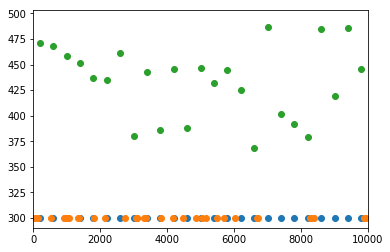

In [106]:
import matplotlib.pyplot as plt

plt.scatter(X_axis[0:500],Y_axis[0:500])  #predicted change point (blue color) frame no vs threshold graph
plt.scatter(x_axis[0:500],y_axis[0:500])  #actual change point (orange color)  frame no vs threshold graph


plt.scatter(X_axis[0:500],Z_axis[0:500])  #actual change point (orange color)  frame no vs diff in bic graph
plt.xlim(0,10000)


plt.show()

# conclusion

In [92]:
# as evident from the graph, blue points(actual change poitns) and orange points(predicted change points) 
# are more(or less) coincident. This shows that our model has attained a decent accuracy score.

In [93]:
# Green points denote the predicted change points and they also show the magnitude of difference of 
# bic scores of two speakers on either side of change point.